<a href="https://colab.research.google.com/github/nielcosta/analise-de-dados/blob/main/Analise_Redes_Sociais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Redes Sociais
Análise de Interação com Posts Lançados



Importação de Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Importação dos Arquivos

In [2]:
# Importando o arquivo NEWS DATA

df_news = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/News_Final.csv',encoding='utf-8')
df_news

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0


In [3]:
df_news = df_news.rename(columns={

    'IDLink	': 'ID_Link',
    'Title': 'Titulo',
    'Headline': 'Subtitulo',
    'Source': 'Fonte',
    'Topic':'Tema',
    'PublishDate': 'Data de Publicacao',
    'SentimentHeadline	': 'Interacao_Titulo',
    'Source': 'Fonte',
    'Topic	': 'Tema',
    'PublishDate': 'Data de Publicacao',
    'SentimentTitle':'Interação Titulo',
    'SentimentHeadline':'Interação SubTitulo',
    'Facebook': 'Facebook',
    'GooglePlus':'GooglePlus',
    'Linkedin': 'Linkedin',

})
df_news

,IDLink,Titulo,Subtitulo,Fonte,Tema,Data de Publicacao,Interação Titulo,Interação SubTitulo,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0


### Carregando Dados de FeedBack das Redes Sociais

In [4]:
# Carregando Dados do FeedBack Facebook

df_face_Eco = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/Facebook_Economy.csv',encoding='utf-8')
df_face_Mic= pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/Facebook_Microsoft.csv',encoding='utf-8')
df_face_Oba= pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/Facebook_Obama.csv',encoding='utf-8')
df_face_Pal= pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/Facebook_Palestine.csv',encoding='utf-8')


In [5]:
#Impressão dos Arquivos Importados
df_face_Eco
df_face_Mic
df_face_Eco
df_face_Pal


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,61974,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,68,68,68,68,68,68,68,68,68,68
1,61975,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,67,67,67,67
2,61976,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
3,61977,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,51,51,51,51,51,51,52,52,52,52
4,61978,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,153,155,155,155,157,157,157,157,157,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7682,104782,4,4,4,4,5,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
7683,104793,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
7684,104794,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7685,104799,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [6]:
# Carregando Dados do FeedBack Google+

df_google_Eco = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/GooglePlus_Economy.csv',encoding='utf-8')
df_google_Mic = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/GooglePlus_Microsoft.csv',encoding='utf-8')
df_google_Oba = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/GooglePlus_Obama.csv',encoding='utf-8')
df_google_Pal = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/GooglePlus_Palestine.csv',encoding='utf-8')



In [7]:
#Impressão dos Arquivos Importados
df_google_Eco
df_google_Mic
df_google_Oba
df_google_Pal


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,61974,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
1,61975,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,16,16,16,16
2,61976,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,61977,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
4,61978,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,104782,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7745,104793,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7746,104794,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7747,104799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Carregando Dados do FeedBack Linkedin

df_linkedin_Eco = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/LinkedIn_Economy.csv',encoding='utf-8')
df_linkedin_Mic = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/LinkedIn_Microsoft.csv',encoding='utf-8')
df_linkedin_Oba = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/LinkedIn_Obama.csv',encoding='utf-8')
df_linkedin_Pal = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Redes Sociais/LinkedIn_Palestine.csv',encoding='utf-8')



In [9]:
#Impressão dos Arquivos Importados
df_linkedin_Eco
df_linkedin_Mic
df_linkedin_Oba
df_linkedin_Pal


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,61974,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,14,14,14,14,18,18,18,18,18,18
1,61975,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,0,0,0,0
2,61976,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,61977,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
4,61978,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,104782,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7745,104793,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7746,104794,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7747,104799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Medir a Popularidade média por hora de publicação

# Criando uma nova coluna com a hora de publicação
df_news['Hora_Publicacao'] = df_news['Data de Publicacao'].str.split(' ', expand=True)[1]

# Agrupando os dados por hora de publicação e calculando a média das interações
df_popularidade_hora = df_news.groupby('Hora_Publicacao')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Imprimindo a tabela de popularidade média por hora de publicação
print(df_popularidade_hora)


                   Facebook  GooglePlus   LinkedIn
Hora_Publicacao                                   
00:00:00         102.473745    2.098342   6.134270
00:00:03          -1.000000    0.000000   0.000000
00:00:04           2.500000    0.000000   5.333333
00:00:05          61.333333    1.000000   3.500000
00:00:06          26.500000    0.500000  18.000000
...                     ...         ...        ...
23:59:21           5.000000    0.000000   4.000000
23:59:27           5.000000    0.000000   1.000000
23:59:29           1.000000    0.000000   1.000000
23:59:31           4.000000    5.000000   2.000000
23:59:52          24.000000    3.000000  26.000000

[30687 rows x 3 columns]


In [11]:
# prompt: Gere uma gráfico de temperatura medindo a popularidade média por hora de publicação

# Criando um gráfico de temperatura
fig = px.imshow(df_popularidade_hora, text_auto=True)

# Configurando o título e os rótulos dos eixos
fig.update_layout(
    title='Popularidade Média por Hora de Publicação',
    xaxis_title='Hora de Publicação',
    yaxis_title='Popularidade'
)

# Exibindo o gráfico
fig.show()


In [12]:
# prompt: Transcreva o codigo a seguir para data frame python: ## Average Popularity by Publication Weekday
# news["Weekday"] <- weekdays(as.Date(news$PublishDate))
# news$Weekday <- factor(news$Weekday)
# levels(news$Weekday) <- c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
# news_facebook <- news[news$Facebook>0,]
# news_googleplus <- news[news$GooglePlus>0,]
# news_linkedin <- news[news$

# Average Popularity by Publication Weekday
df_news['Weekday'] = pd.to_datetime(df_news['Data de Publicacao']).dt.day_name()
df_news['Weekday'] = pd.Categorical(df_news['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df_news_facebook = df_news[df_news['Facebook'] > 0]
df_news_googleplus = df_news[df_news['GooglePlus'] > 0]
df_news_linkedin = df_news[df_news['LinkedIn'] > 0]

# Calculating the average popularity for each weekday
df_popularidade_dia_semana = pd.concat([
    df_news_facebook.groupby('Weekday')['Facebook'].mean(),
    df_news_googleplus.groupby('Weekday')['GooglePlus'].mean(),
    df_news_linkedin.groupby('Weekday')['LinkedIn'].mean()
], axis=1)

# Renaming the columns
df_popularidade_dia_semana.columns = ['Facebook', 'GooglePlus', 'LinkedIn']

# Printing the table
print(df_popularidade_dia_semana)


             Facebook  GooglePlus   LinkedIn
Weekday                                     
Monday     140.009670    9.668391  58.697835
Tuesday    165.726176   10.376854  42.039954
Wednesday  152.964612    9.767995  37.315879
Thursday   173.251396    9.917077  37.469562
Friday     173.362140    9.723269  34.571172
Saturday   201.172967   10.823929  31.939689
Sunday     153.235764    9.893683  35.423963


In [13]:
# prompt: REnomeie  a Coluna Weekday para dias da semana.

df_news = df_news.rename(columns={'Weekday': 'Dia da Semana'})


In [14]:
# prompt: Passe todo conteúdo da tabela para Português Brasil

# Traduzindo os nomes das colunas
df_popularidade_hora.rename(columns={
    'Facebook': 'Curtidas no Facebook',
    'GooglePlus': 'Compartilhamentos no Google+',
    'LinkedIn': 'Compartilhamentos no LinkedIn'
}, inplace=True)

# Traduzindo os nomes dos dias da semana
df_popularidade_dia_semana.rename(columns={
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}, inplace=True)

# Imprimindo as tabelas traduzidas
print("Popularidade Média por Hora de Publicação:")
print(df_popularidade_hora)

print("\nPopularidade Média por Dia da Semana:")
print(df_popularidade_dia_semana)


Popularidade Média por Hora de Publicação:
                 Curtidas no Facebook  Compartilhamentos no Google+  \
Hora_Publicacao                                                       
00:00:00                   102.473745                      2.098342   
00:00:03                    -1.000000                      0.000000   
00:00:04                     2.500000                      0.000000   
00:00:05                    61.333333                      1.000000   
00:00:06                    26.500000                      0.500000   
...                               ...                           ...   
23:59:21                     5.000000                      0.000000   
23:59:27                     5.000000                      0.000000   
23:59:29                     1.000000                      0.000000   
23:59:31                     4.000000                      5.000000   
23:59:52                    24.000000                      3.000000   

                 Compartilhamento

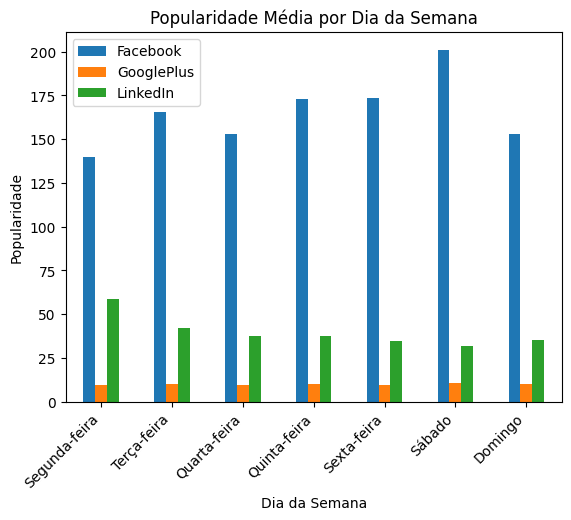

In [15]:
# prompt: Crie um grafico de barras verificando a popularidade de redes sociais durante a semana. Este gráfico será todo traduzido para o Portuguê BR. OS valores de X , devem ser os dias da semana em Português

# Criando o gráfico de barras
df_popularidade_dia_semana.plot.bar()

# Configurando o título e os rótulos dos eixos
plt.title('Popularidade Média por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Popularidade')

# Traduzindo os rótulos dos eixos
plt.xticks(rotation=45, ha='right')
plt.xticks(ticks=range(7), labels=['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo'])

# Exibindo o gráfico
plt.show()


### Notícias por Tópico do Dia


In [16]:

# Extraindo a data e o tópico das notícias
news_topic = df_news[['Data de Publicacao', 'Tema']]

# Criando uma nova coluna com o dia da publicação
news_topic['Dia'] = news_topic['Data de Publicacao'].str.split(' ', expand=True)[0]

# Agrupando os dados por dia e tópico e contando o número de notícias
nr_news_topic = news_topic.groupby(['Dia', 'Tema']).size().reset_index(name='nrNews')

# Filtrando os dados para o período desejado
nr_news_topic = nr_news_topic[(nr_news_topic['Dia'] > '2015-11-09') & (nr_news_topic['Dia'] < '2016-07-08')]



<ipython-input-16-b464f71aceff>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



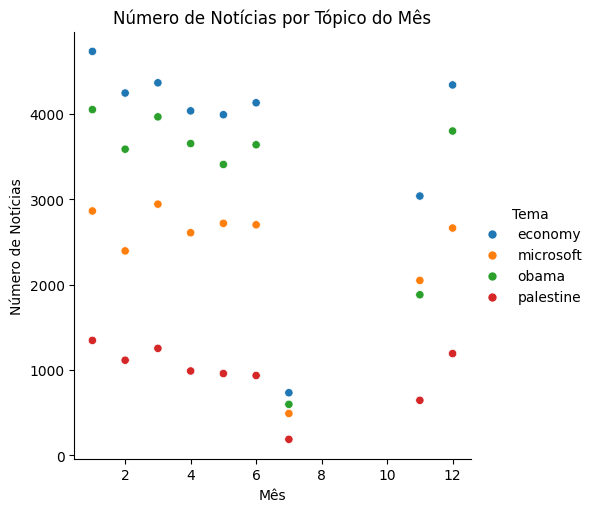

In [17]:
# prompt: Com os dados anteriormente apresentados gere um gráfico de dispersão com valores de mês em mês

# Criando uma nova coluna com o mês da publicação
nr_news_topic['Mes'] = pd.to_datetime(nr_news_topic['Dia']).dt.month

# Agrupando os dados por mês e tópico e somando o número de notícias
nr_news_topic_mes = nr_news_topic.groupby(['Mes', 'Tema'])['nrNews'].sum().reset_index()

# Criando o gráfico de dispersão
sns.relplot(x='Mes', y='nrNews', hue='Tema', kind='scatter', data=nr_news_topic_mes)

# Configurando o título e os rótulos dos eixos
plt.title('Número de Notícias por Tópico do Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Notícias')

# Exibindo o gráfico
plt.show()


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Supondo que 'df_news' é seu DataFrame original em Python contendo as notícias

news_economy = df_news[df_news['Tema'] == 'economy']
news_economy = news_economy.sort_values(by='Data de Publicacao')
news_economy.reset_index(drop=True, inplace=True)

# Removendo linhas com valores NaN no Subtitulo
news_economy = news_economy.dropna(subset=['Subtitulo'])

corpus = news_economy['Subtitulo'].tolist()

# Verificar se há documentos restantes após a remoção de NaN
if not corpus:
    print("Não há documentos válidos no corpus após a remoção de NaN.")
else:
    # Removendo palavras irrelevantes
    my_stopwords = text.ENGLISH_STOP_WORDS.union(["economy", "next", "break", "else", "terms", "while"])
    vectorizer = CountVectorizer(stop_words=list(my_stopwords), token_pattern=r'\b\w+\b')
    X = vectorizer.fit_transform(corpus)

    # Verificando se o vocabulário não está vazio
    if X.shape[1] == 0:
        print("Todos os documentos contêm apenas stop words ou são vazios. Verifique seu corpus.")
    else:
        # Criando DataFrame
        DTM_train = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

        # Adicionando colunas extras
        DTM_train['IDLink'] = news_economy['IDLink'].astype(int)
        DTM_train['Data de Publicacao'] = pd.to_datetime(news_economy['Data de Publicacao'])
        DTM_train['Interação Titulo'] = news_economy['Interação Titulo'].astype(float)
        DTM_train['Interação SubTitulo'] = news_economy['Interação SubTitulo'].astype(float)

        # Filtrando linhas com valores nulos (caso necessário)
        # DTM_train = DTM_train.dropna()

        print(DTM_train)


       0  00  000  000333  0025  0031  00am  01  \
0      0   0    0       0     0     0     0   0   
1      0   0    0       0     0     0     0   0   
2      0   0    0       0     0     0     0   0   
3      0   0    0       0     0     0     0   0   
4      2   0    0       0     0     0     0   0   
...   ..  ..  ...     ...   ...   ...   ...  ..   
33918  0   0    0       0     0     0     0   0   
33919  0   0    0       0     0     0     0   0   
33920  0   0    0       0     0     0     0   0   
33921  0   0    0       0     0     0     0   0   
33922  0   0    0       0     0     0     0   0   

       010020070750000000000000011200000000000000  0152  ...  zvezda  \
0                                               0     0  ...       0   
1                                               0     0  ...       0   
2                                               0     0  ...       0   
3                                               0     0  ...       0   
4                          

<ipython-input-30-b37d71c1fc2f>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




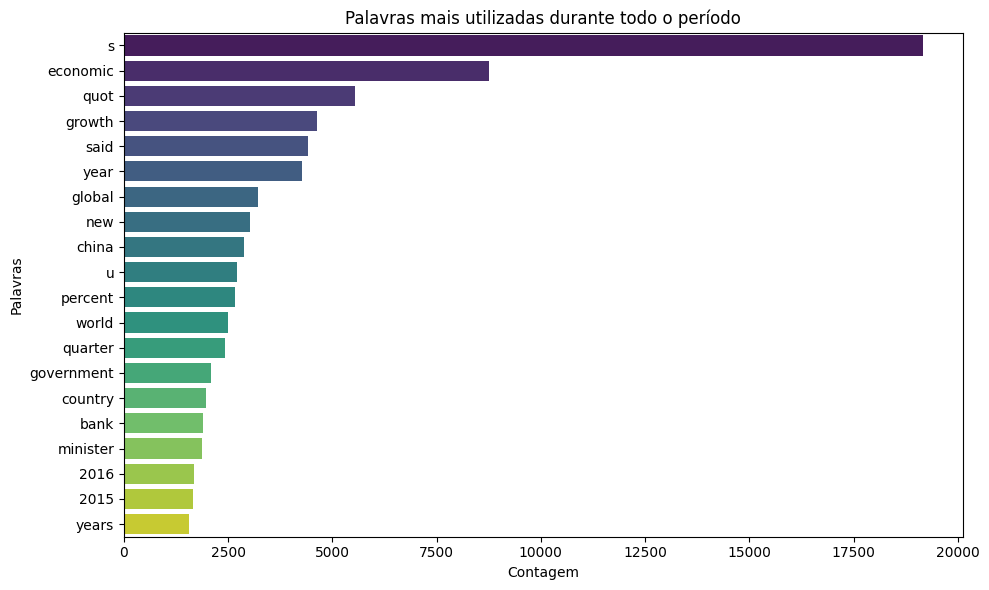

In [30]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df_news' é seu DataFrame original em Python contendo as notícias

# Função para processar o texto e contar as palavras
def count_words(df):
    # Removendo linhas com valores NaN no Subtitulo
    df = df.dropna(subset=['Subtitulo'])

    # Removendo palavras irrelevantes
    my_stopwords = text.ENGLISH_STOP_WORDS.union(["economy", "next", "break", "else", "terms", "while"])
    vectorizer = CountVectorizer(stop_words=list(my_stopwords), token_pattern=r'\b\w+\b')
    X = vectorizer.fit_transform(df['Subtitulo'])

    # Criando DataFrame com a contagem de palavras
    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Somando as ocorrências de cada palavra em todos os documentos
    total_word_counts = word_counts.sum(axis=0)

    # Ordenando as palavras pelo número de ocorrências
    sorted_word_counts = total_word_counts.sort_values(ascending=False)

    return sorted_word_counts

# Chamando a função para contar as palavras
word_counts_all = count_words(df_news[df_news['Tema'] == 'economy'])

# Selecionando as 20 palavras mais utilizadas
top_words = word_counts_all.head(20)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.title('Palavras mais utilizadas durante todo o período')
plt.xlabel('Contagem')
plt.ylabel('Palavras')
plt.tight_layout()

# Exibindo o gráfico
plt.show()
